In [1]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def calc(wrapper, cor: float, seed:float = None):
    generator = wrapper(cor, seed)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

In [3]:
def run_tests(wrapper, cor_rng = np.arange(0, 1.01, 0.05), repeats=100):
    result = []

    sed = 0
    for cor in cor_rng:
        for _ in range(repeats):
            cr, ld= calc(wrapper, cor, sed)

            result.append((cor, cr, ld))
            sed += 1

    return pd.DataFrame(result, columns=['expected', 'actual', 'load'])

In [4]:
# params
N = 1000
F = N
size=100

In [5]:
def gamma_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    return ga.Generator(F, size, cor, (4,8), seed=seed)

def mn2_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    return mn.Generator2(F, size, cor, (8,16), (1,2), seed=seed)

def mn_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    return mn.Generator(F, size, cor, (8,16), (1,2), seed=seed)

# Time performance

In [6]:
%%timeit
fg = gamma_wrapper(0)

32.8 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
fg = gamma_wrapper(0)
fg.generate_cloud_load_vectors()

66.2 ms ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
fm = mn_wrapper(0)

11.1 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
fm = mn_wrapper(0)
fm.generate_cloud_load_vectors()

921 ms ± 240 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
fm2 = mn2_wrapper(0)

The slowest run took 4.28 times longer than the fastest. This could mean that an intermediate result is being cached.
53.3 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
fm2 = mn2_wrapper(0)
fm2.generate_cloud_load_vectors()

1.14 s ± 91.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Tests

In [12]:
%%time
df_ga = run_tests(gamma_wrapper)

CPU times: user 7min 12s, sys: 4min 56s, total: 12min 9s
Wall time: 3min 46s


In [13]:
%%time
df_mn = run_tests(mn_wrapper, repeats=50)

KeyboardInterrupt: 

In [15]:
%%time
df_mn2 = run_tests(mn2_wrapper)

CPU times: user 7min 10s, sys: 4min 51s, total: 12min 1s
Wall time: 3min 54s


In [16]:
# df_ga.to_csv('results/gamma-gen-100.csv', index=False)
# df_mn.to_csv('results/gamma-nor-100.csv', index=False)
# df_mn2.to_csv('results/gamma-nor2-100.csv', index=False)

# Plots

In [17]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})
mnped2 = df_mn2.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})

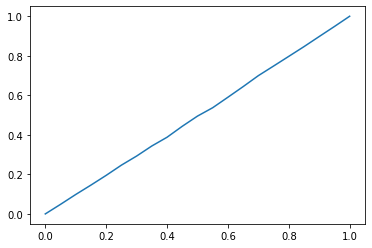

In [18]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

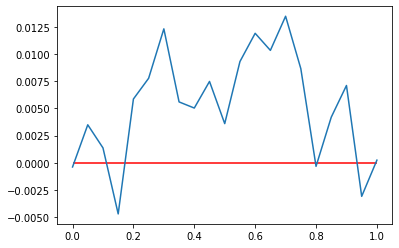

In [19]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, (grped.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

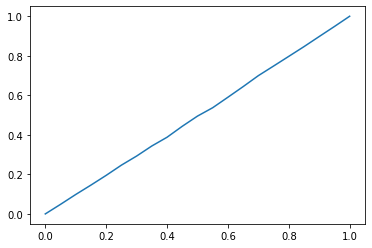

In [20]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

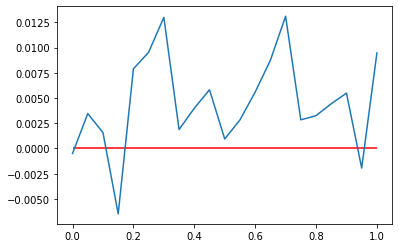

In [21]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, (mnped.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

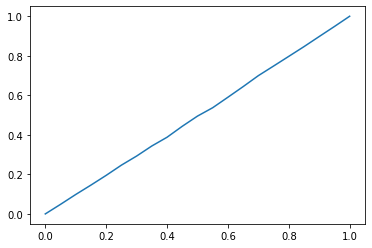

In [22]:
plt.plot(mnped2.index, mnped2.actual['mean'])
plt.show()

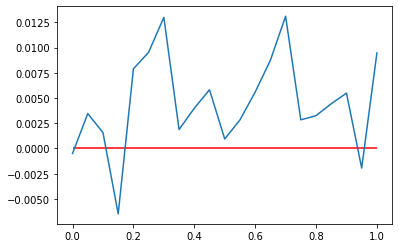

In [23]:
line = mn2_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped2.index, (mnped2.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

In [24]:
grped

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000274   100  1.584425e-04  1.199404e+06  1.199534e+06   100   
0.05      0.048654   100  6.516523e-03  1.204153e+06  1.204187e+06   100   
0.10      0.098550   100  1.258736e-02  1.201886e+06  1.201639e+06   100   
0.15      0.146127   100  1.796473e-02  1.192213e+06  1.194355e+06   100   
0.20      0.195226   100  2.342672e-02  1.209474e+06  1.207034e+06   100   
0.25      0.246907   100  2.765275e-02  1.211446e+06  1.209323e+06   100   
0.30      0.292840   100  2.969644e-02  1.215600e+06  1.214776e+06   100   
0.35      0.343826   100  3.854529e-02  1.202255e+06  1.206714e+06   100   
0.40      0.388028   100  3.609633e-02  1.204785e+06  1.206037e+06   100   
0.45      0.443435   100  4.690415e-02  1.206986e+06  1.208973e+06   100   
0.50      0.494945   100  4.276371e-02  1.201128e+06  1.204318e+06   100   
0.55      0.537372   100  4.834494e-02  1.203395e+06  1.211168e+06   100   
0.60      0.590398   100  3.930683e-02  1.206706e+06  1.214286e+06   100   
0.65      0.644065   100  4.582535e-02  1.210490e+06  1.212401e+06   100   
0.70      0.699552   100  4.812062e-02  1.215731e+06  1.216168e+06   100   
0.75      0.748108   100  3.639915e-02  1.203408e+06  1.210386e+06   100   
0.80      0.797149   100  3.291266e-02  1.203902e+06  1.199605e+06   100   
0.85      0.846345   100  2.508951e-02  1.205322e+06  1.205029e+06   100   
0.90      0.897501   100  1.885484e-02  1.206583e+06  1.208526e+06   100   
0.95      0.948171   100  1.127811e-02  1.197666e+06  1.196294e+06   100   
1.00      1.000000   100  2.381836e-09  1.211364e+06  1.200288e+06   100   

                        
                   std  
expected                
0.00       8009.387954  
0.05      19231.723772  
0.10      28378.164508  
0.15      31176.156963  
0.20      33741.777956  
0.25      37220.969388  
0.30      42712.963364  
0.35      47438.786312  
0.40      52301.555412  
0.45      52961.353612  
0.50      54159.758447  
0.55      64742.154737  
0.60      56310.943174  
0.65      69142.090258  
0.70      70597.092865  
0.75      75554.187030  
0.80      79286.349933  
0.85      71018.706181  
0.90      83647.609077  
0.95      85323.150034  
1.00      90774.709232

In [25]:
mnped

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000274   100  1.584425e-04  1.199404e+06  1.199534e+06   100   
0.05      0.048654   100  6.516523e-03  1.204153e+06  1.204187e+06   100   
0.10      0.098550   100  1.258736e-02  1.201886e+06  1.201639e+06   100   
0.15      0.146127   100  1.796473e-02  1.192213e+06  1.194355e+06   100   
0.20      0.195226   100  2.342672e-02  1.209474e+06  1.207034e+06   100   
0.25      0.246907   100  2.765275e-02  1.211446e+06  1.209323e+06   100   
0.30      0.292840   100  2.969644e-02  1.215600e+06  1.214776e+06   100   
0.35      0.343826   100  3.854529e-02  1.202255e+06  1.206714e+06   100   
0.40      0.388028   100  3.609633e-02  1.204785e+06  1.206037e+06   100   
0.45      0.443435   100  4.690415e-02  1.206986e+06  1.208973e+06   100   
0.50      0.494945   100  4.276371e-02  1.201128e+06  1.204318e+06   100   
0.55      0.537372   100  4.834494e-02  1.203395e+06  1.211168e+06   100   
0.60      0.590398   100  3.930683e-02  1.206706e+06  1.214286e+06   100   
0.65      0.644065   100  4.582535e-02  1.210490e+06  1.212401e+06   100   
0.70      0.699552   100  4.812062e-02  1.215731e+06  1.216168e+06   100   
0.75      0.748108   100  3.639915e-02  1.203408e+06  1.210386e+06   100   
0.80      0.797149   100  3.291266e-02  1.203902e+06  1.199605e+06   100   
0.85      0.846345   100  2.508951e-02  1.205322e+06  1.205029e+06   100   
0.90      0.897501   100  1.885484e-02  1.206583e+06  1.208526e+06   100   
0.95      0.948171   100  1.127811e-02  1.197666e+06  1.196294e+06   100   
1.00      1.000000   100  2.381836e-09  1.211364e+06  1.200288e+06   100   

                        
                   std  
expected                
0.00       8009.387954  
0.05      19231.723772  
0.10      28378.164508  
0.15      31176.156963  
0.20      33741.777956  
0.25      37220.969388  
0.30      42712.963364  
0.35      47438.786312  
0.40      52301.555412  
0.45      52961.353612  
0.50      54159.758447  
0.55      64742.154737  
0.60      56310.943174  
0.65      69142.090258  
0.70      70597.092865  
0.75      75554.187030  
0.80      79286.349933  
0.85      71018.706181  
0.90      83647.609077  
0.95      85323.150034  
1.00      90774.709232

In [26]:
mnped2

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000274   100  1.584425e-04  1.199404e+06  1.199534e+06   100   
0.05      0.048654   100  6.516523e-03  1.204153e+06  1.204187e+06   100   
0.10      0.098550   100  1.258736e-02  1.201886e+06  1.201639e+06   100   
0.15      0.146127   100  1.796473e-02  1.192213e+06  1.194355e+06   100   
0.20      0.195226   100  2.342672e-02  1.209474e+06  1.207034e+06   100   
0.25      0.246907   100  2.765275e-02  1.211446e+06  1.209323e+06   100   
0.30      0.292840   100  2.969644e-02  1.215600e+06  1.214776e+06   100   
0.35      0.343826   100  3.854529e-02  1.202255e+06  1.206714e+06   100   
0.40      0.388028   100  3.609633e-02  1.204785e+06  1.206037e+06   100   
0.45      0.443435   100  4.690415e-02  1.206986e+06  1.208973e+06   100   
0.50      0.494945   100  4.276371e-02  1.201128e+06  1.204318e+06   100   
0.55      0.537372   100  4.834494e-02  1.203395e+06  1.211168e+06   100   
0.60      0.590398   100  3.930683e-02  1.206706e+06  1.214286e+06   100   
0.65      0.644065   100  4.582535e-02  1.210490e+06  1.212401e+06   100   
0.70      0.699552   100  4.812062e-02  1.215731e+06  1.216168e+06   100   
0.75      0.748108   100  3.639915e-02  1.203408e+06  1.210386e+06   100   
0.80      0.797149   100  3.291266e-02  1.203902e+06  1.199605e+06   100   
0.85      0.846345   100  2.508951e-02  1.205322e+06  1.205029e+06   100   
0.90      0.897501   100  1.885484e-02  1.206583e+06  1.208526e+06   100   
0.95      0.948171   100  1.127811e-02  1.197666e+06  1.196294e+06   100   
1.00      1.000000   100  2.381836e-09  1.211364e+06  1.200288e+06   100   

                        
                   std  
expected                
0.00       8009.387954  
0.05      19231.723772  
0.10      28378.164508  
0.15      31176.156963  
0.20      33741.777956  
0.25      37220.969388  
0.30      42712.963364  
0.35      47438.786312  
0.40      52301.555412  
0.45      52961.353612  
0.50      54159.758447  
0.55      64742.154737  
0.60      56310.943174  
0.65      69142.090258  
0.70      70597.092865  
0.75      75554.187030  
0.80      79286.349933  
0.85      71018.706181  
0.90      83647.609077  
0.95      85323.150034  
1.00      90774.709232